In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20, 10)  # what this line does?  # set the default figure size of the plots to 20x10
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv("../Data/house_price_mumbai.csv")
df

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45 Cr
...,...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,Mumbai,966,"4,968",48 L
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,Mumbai,500,"5,200",26 L
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,Mumbai,610,"5,573",34 L
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,Mumbai,610,"5,245",32 L


In [4]:
df.shape

(3980, 7)

In [5]:
df2=df.drop(['project','City'],axis="columns")
df2

,BHK,Location,Total sqft,price_sqft,price
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...
3975,2 BHK Apartment,Vasai,966,"4,968",48 L
3976,1 BHK Apartment,Naigaon East,500,"5,200",26 L
3977,1 BHK Apartment,Naigaon East,610,"5,573",34 L
3978,1 BHK Apartment,Naigaon East,610,"5,245",32 L


In [6]:
df2.isnull().sum()

BHK           0
Location      0
Total sqft    0
price_sqft    0
price         0
dtype: int64

In [7]:
df2["BHK"].unique()

array(['3 BHK Apartment', '2 BHK Apartment', '1 BHK Independent House',
       '1 BHK Apartment', '1 RK Studio Apartment', '1', '4 BHK Apartment',
       'R', '3', '2', '5 BHK Independent Floor',
       '6 BHK Independent Floor', '3 BHK Independent Floor',
       '3 BHK Independent House', '3 BHK Villa', '4',
       '2 BHK Independent Floor', '5', '2 RK Studio Apartment',
       '5 BHK Independent House', '6', '5 BHK Apartment',
       '2 BHK Independent House'], dtype=object)

In [20]:
values_to_drop = ["1 BHK Independent House", "1 RK Studio Apartment", "5 BHK Independent Floor", "6 BHK Independent Floor", "3 BHK Independent Floor","3 BHK Independent House","3 BHK Villa","2 BHK Independent Floor","2 RK Studio Apartment","5 BHK Independent House","2 BHK Independent House","R","6","BHK"]

In [21]:
mask = df2["BHK"].isin(values_to_drop)

In [22]:
df3=df2[~mask]
df3

,BHK,Location,Total sqft,price_sqft,price
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...
3975,2 BHK Apartment,Vasai,966,"4,968",48 L
3976,1 BHK Apartment,Naigaon East,500,"5,200",26 L
3977,1 BHK Apartment,Naigaon East,610,"5,573",34 L
3978,1 BHK Apartment,Naigaon East,610,"5,245",32 L


In [23]:
df3.BHK.unique()

array(['3 BHK Apartment', '2 BHK Apartment', '1 BHK Apartment', '1',
       '4 BHK Apartment', '3', '2', '4', '5', '5 BHK Apartment'],
      dtype=object)

In [24]:
df3.BHK.replace({'1':'1 BHK Apartment','2':'2 BHK Apartment','3':'3 BHK Apartment','4':'BHK Apartment','5':'5 BHK Apartment'},inplace=True)

In [25]:
df3.BHK.unique()

array(['3 BHK Apartment', '2 BHK Apartment', '1 BHK Apartment',
       '4 BHK Apartment', 'BHK Apartment', '5 BHK Apartment'],
      dtype=object)

In [26]:
df3

,BHK,Location,Total sqft,price_sqft,price
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...
3975,2 BHK Apartment,Vasai,966,"4,968",48 L
3976,1 BHK Apartment,Naigaon East,500,"5,200",26 L
3977,1 BHK Apartment,Naigaon East,610,"5,573",34 L
3978,1 BHK Apartment,Naigaon East,610,"5,245",32 L


In [27]:
df3['Bhk']=df3['BHK'].apply(lambda x: x.split(' ')[0])
df3.head()

,BHK,Location,Total sqft,price_sqft,price,Bhk
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2


In [28]:
df4=df3.copy()
df4

,BHK,Location,Total sqft,price_sqft,price,Bhk
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2
...,...,...,...,...,...,...
3975,2 BHK Apartment,Vasai,966,"4,968",48 L,2
3976,1 BHK Apartment,Naigaon East,500,"5,200",26 L,1
3977,1 BHK Apartment,Naigaon East,610,"5,573",34 L,1
3978,1 BHK Apartment,Naigaon East,610,"5,245",32 L,1


In [17]:
df4.drop("BHK",axis="columns",inplace=True)
df4

,Location,Total sqft,price_sqft,price,Bhk
0,Chembur,984,"31,000",3.05 Cr,3
1,Kurla,598,"23,913",1.42 Cr,2
2,Malad West,738,"21,000",1.54 Cr,2
3,Rasayani,644,"10,676",68.75 L,3
4,Vikhroli,582,"24,914",1.45 Cr,2
...,...,...,...,...,...
3975,Vasai,966,"4,968",48 L,2
3976,Naigaon East,500,"5,200",26 L,1
3977,Naigaon East,610,"5,573",34 L,1
3978,Naigaon East,610,"5,245",32 L,1


In [29]:
df4["Bhk"].dtype

dtype('O')

In [31]:
df4["Bhk"].unique()

array(['3', '2', '1', '4', 'BHK', '5'], dtype=object)

In [32]:
mask2=df4["Bhk"]!='BHK'

In [33]:
df5=df4[mask2]
df5

,BHK,Location,Total sqft,price_sqft,price,Bhk
0,3 BHK Apartment,Chembur,984,"31,000",3.05 Cr,3
1,2 BHK Apartment,Kurla,598,"23,913",1.42 Cr,2
2,2 BHK Apartment,Malad West,738,"21,000",1.54 Cr,2
3,3 BHK Apartment,Rasayani,644,"10,676",68.75 L,3
4,2 BHK Apartment,Vikhroli,582,"24,914",1.45 Cr,2
...,...,...,...,...,...,...
3975,2 BHK Apartment,Vasai,966,"4,968",48 L,2
3976,1 BHK Apartment,Naigaon East,500,"5,200",26 L,1
3977,1 BHK Apartment,Naigaon East,610,"5,573",34 L,1
3978,1 BHK Apartment,Naigaon East,610,"5,245",32 L,1


In [34]:
df5["Bhk"].unique()

array(['3', '2', '1', '4', '5'], dtype=object)

In [35]:
df5.to_csv('df5.csv', index=False)

Converting the price column into proper numerical digits

In [37]:
df5['price'].dtype

dtype('O')

In [38]:
conversion_factors = {'L': 1_00_000, 'Cr': 1_00_00_000}

def convert_price(price_str):
    if isinstance(price_str, object):
        value, unit = price_str.split()  # Split value and unit
        return float(value) * conversion_factors[unit]  # Convert value to numeric
    return price_str



In [39]:
df5["price"] = df5["price"].apply(convert_price)

In [41]:
df6=df5.copy()
df6

,BHK,Location,Total sqft,price_sqft,price,Bhk
0,3 BHK Apartment,Chembur,984,"31,000",30500000.0,3
1,2 BHK Apartment,Kurla,598,"23,913",14200000.0,2
2,2 BHK Apartment,Malad West,738,"21,000",15400000.0,2
3,3 BHK Apartment,Rasayani,644,"10,676",6875000.0,3
4,2 BHK Apartment,Vikhroli,582,"24,914",14500000.0,2
...,...,...,...,...,...,...
3975,2 BHK Apartment,Vasai,966,"4,968",4800000.0,2
3976,1 BHK Apartment,Naigaon East,500,"5,200",2600000.0,1
3977,1 BHK Apartment,Naigaon East,610,"5,573",3400000.0,1
3978,1 BHK Apartment,Naigaon East,610,"5,245",3200000.0,1


In [45]:
df6.loc[121]

BHK           2 BHK Apartment
Location        Badlapur West
Total sqft                485
price_sqft              6,670
price               3235000.0
Bhk                         2
Name: 121, dtype: object

In [46]:
df6.loc[345]

BHK           2 BHK Apartment
Location          Bandra West
Total sqft                790
price_sqft             47,468
price              37500000.0
Bhk                         2
Name: 345, dtype: object

In [47]:
len(df6['Location'].unique())

168

In [48]:
df6.shape

(3607, 6)

In [49]:
location_stats=df6.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Andheri West      291
Mira Road East    280
Dombivali         227
Virar             186
Thane West        147
                 ... 
Kasheli             1
Atgaon              1
Kamathipura         1
Datiwali Gaon       1
Shelu               1
Name: Location, Length: 168, dtype: int64

In [54]:
df6["price_sqft"]=df6["price_sqft"].str.replace(",",'').astype(float)

In [55]:
df6.price_sqft.describe()

count     3607.000000
mean     12719.490435
std      10014.606775
min       1520.000000
25%       5474.500000
50%       9841.000000
75%      17187.000000
max      79166.000000
Name: price_sqft, dtype: float64

In [63]:
df6

,BHK,Location,Total sqft,price_sqft,price,Bhk
0,3 BHK Apartment,Chembur,984,31000.0,30500000.0,3
1,2 BHK Apartment,Kurla,598,23913.0,14200000.0,2
2,2 BHK Apartment,Malad West,738,21000.0,15400000.0,2
3,3 BHK Apartment,Rasayani,644,10676.0,6875000.0,3
4,2 BHK Apartment,Vikhroli,582,24914.0,14500000.0,2
...,...,...,...,...,...,...
3975,2 BHK Apartment,Vasai,966,4968.0,4800000.0,2
3976,1 BHK Apartment,Naigaon East,500,5200.0,2600000.0,1
3977,1 BHK Apartment,Naigaon East,610,5573.0,3400000.0,1
3978,1 BHK Apartment,Naigaon East,610,5245.0,3200000.0,1


In [64]:
df6.rename(columns={'Total sqft': 'total_sqft'}, inplace=True)

In [72]:
df6.Bhk=df6.Bhk.astype(int)

In [92]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.Location==location) & (df.Bhk==2)]
    bhk3=df[(df.Location==location) & (df.Bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()



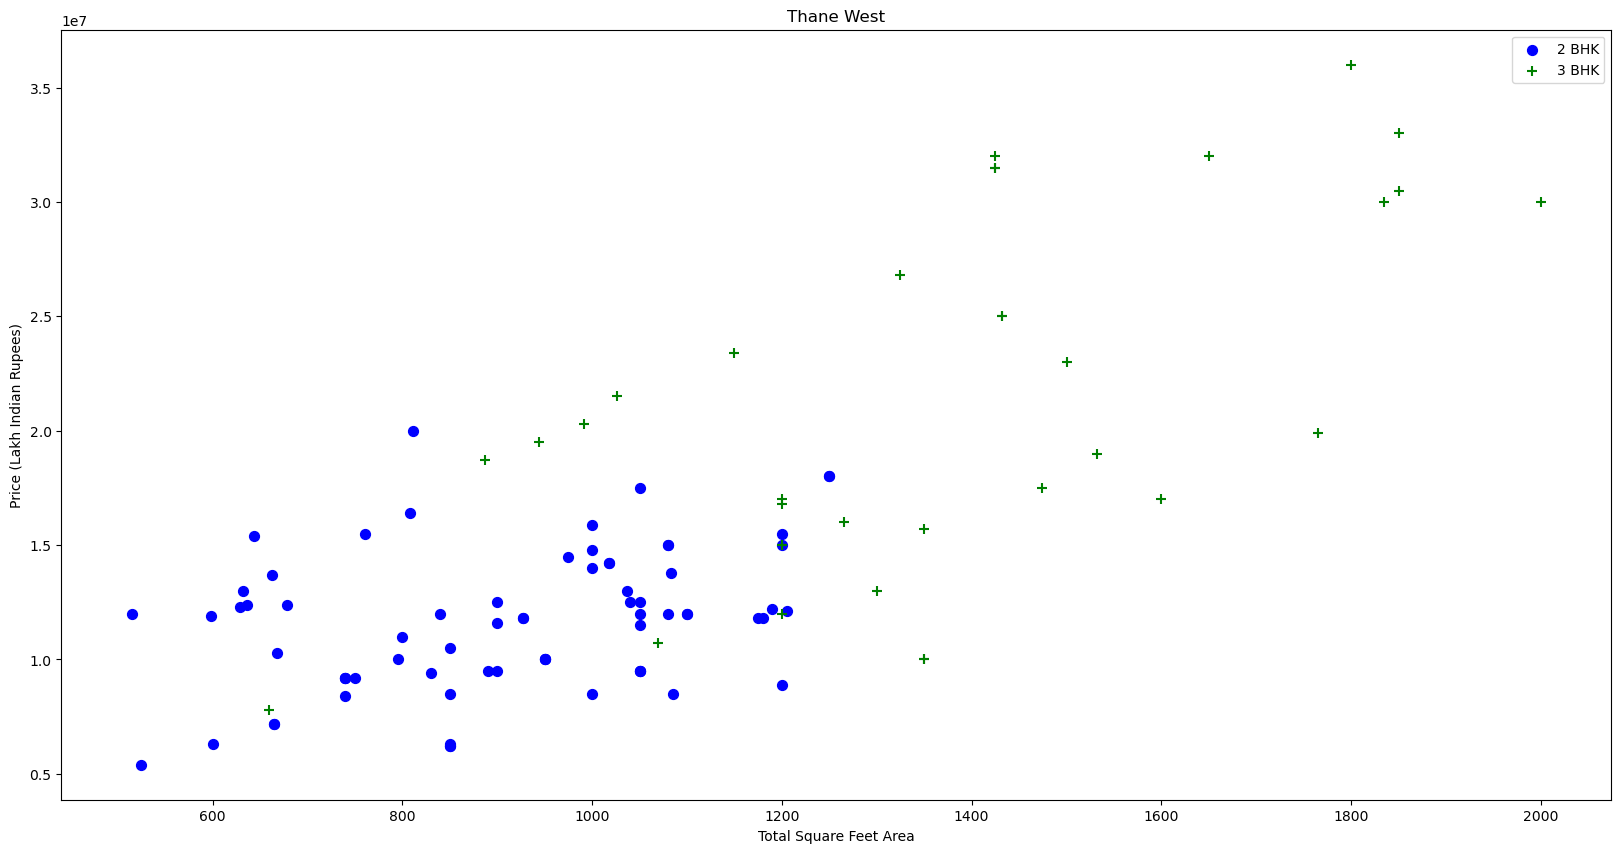

In [99]:
plot_scatter_chart(df6,"Thane West")

In [102]:
df6.groupby('Location')

In [94]:
def remove_Bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Location'):
        Bhk_stats = {}
        for Bhk, Bhk_df in location_df.groupby('Bhk'):
            Bhk_stats[Bhk] = {
                'mean': np.mean(Bhk_df.price_sqft),
                'std': np.std(Bhk_df.price_sqft),
                'count': Bhk_df.shape[0]
            }
        for Bhk, Bhk_df in location_df.groupby('Bhk'):
            stats = Bhk_stats.get(Bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, Bhk_df[Bhk_df.price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')



In [95]:
df6.shape

(3607, 6)

In [96]:
df7=remove_Bhk_outliers(df6)

In [97]:
df7.shape

(2947, 6)

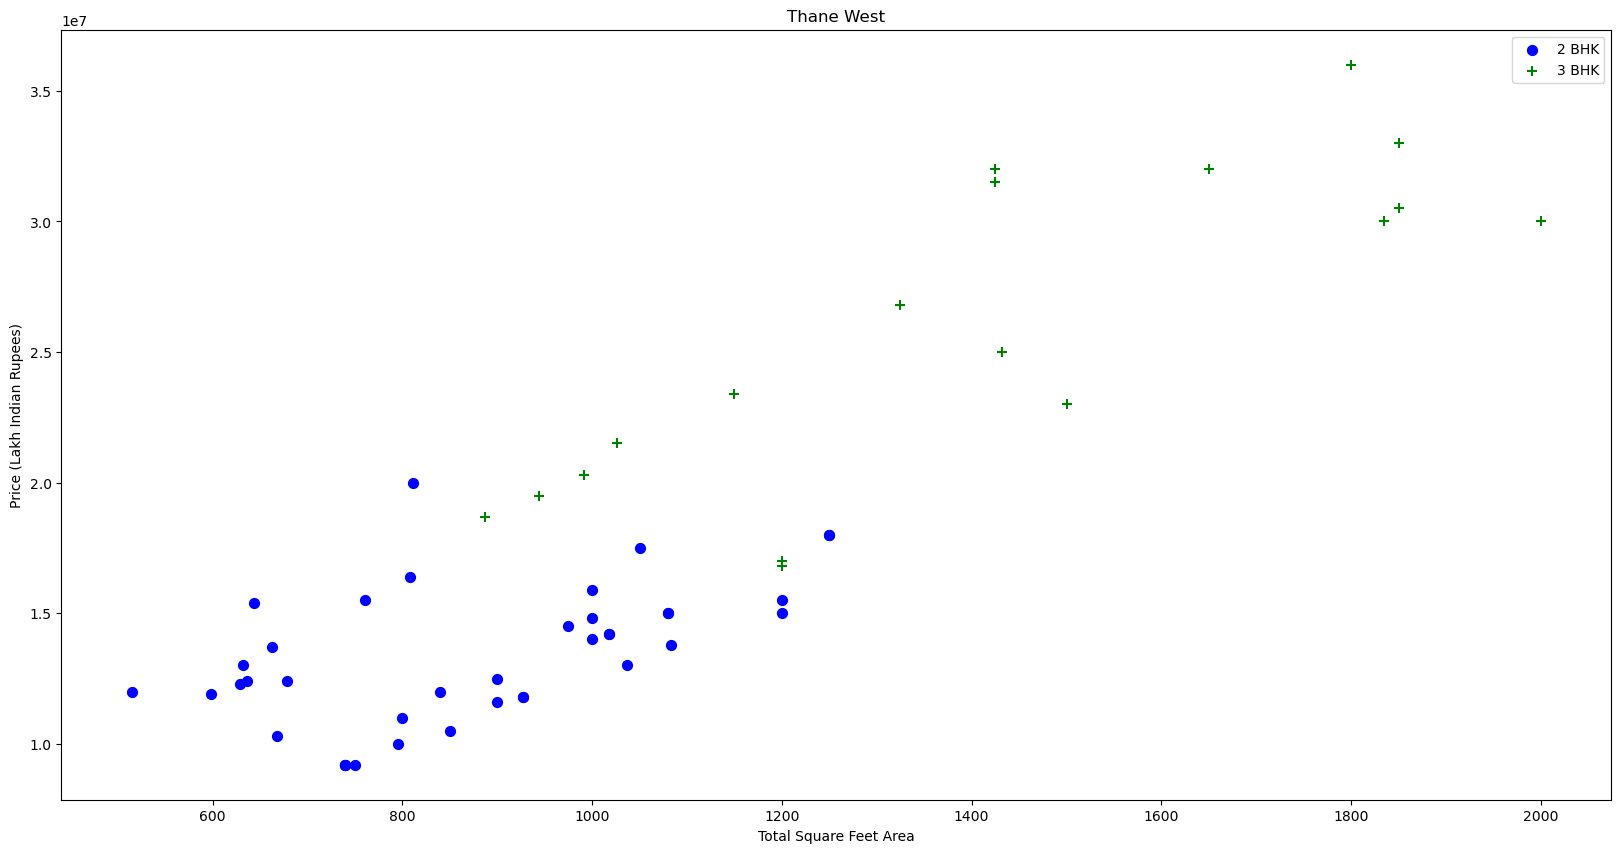

In [98]:
plot_scatter_chart(df7,"Thane West")

Text(0, 0.5, 'Count')

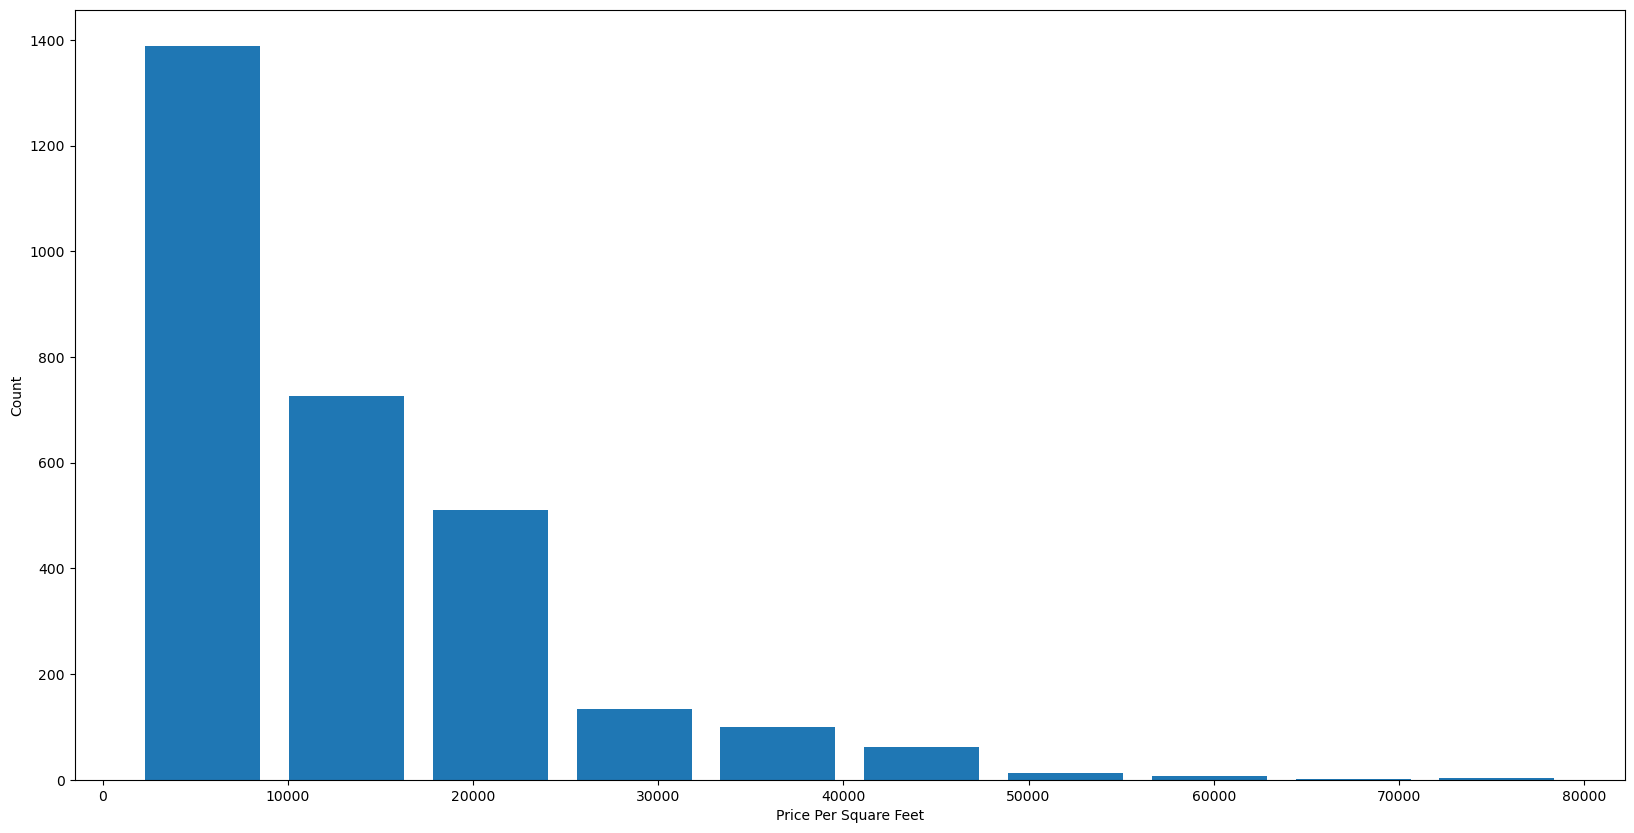

In [103]:
plt.hist(df7.price_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [107]:
hugehousedf=df6[df6['price_sqft'] > 70000]
hugehousedf

,BHK,Location,total_sqft,price_sqft,price,Bhk
846,4 BHK Apartment,Juhu,2400,79166.0,190000000.0,4
1190,4 BHK Apartment,Juhu,2400,79166.0,190000000.0,4
1399,4 BHK Apartment,Juhu,2400,79166.0,190000000.0,4
2865,2 BHK Apartment,Bandra West,1100,77272.0,85000000.0,2
